# Stock Price Predictor 

## Pre-requisites

- You will have to pocess the stock's data in json format in a folder location which istrictly follows the following pattern 
    <b>'data/***stockname***/raw/***type-of-data***'</b>
    
    For example, <b>'data/itc/raw/1h' </b>
    
- The folder location that you will mention below should have json files with data associated with only one stock information. If not the please clean it up and until then do not proceed further with this procedure

- You Will have to ensure that the data provided via the json files are clean 
    - should not have duplicates 
    - should not have incomplete, empty or semi furnished information
    - should not have wrong or assumed data which might screw the predictor. 
    
- You will have to configure the following inputs to kick start the prediction process

- <b><u>CAUTION</u></b> : The procedure will create a folder named "processed" parallel to the folder named"raw" as mentioned in the input format. If you have such a folder already in place <b><u> BE WARNED - IT WILL BE OVER WRITTEN </u></b>. You have been warned.

The following procedure does not have any explict check or validation with respect to the items mentioned above


## Configure inputs

In [1]:
input_path_to_json = 'data/adani/raw/1h' 
print('done')

done


## Kick start the procedure - Collate all json data into a CSV file

Process all json data files in folder mentioned above and and create a cummulative data file in csv format with desirable column headers to help differnentiate or understand the data during further processing in the folder named "processed"

In [2]:
# Include python files defined in the library folder to help facilitate the stock price Prediction 
import os
import sys  
module_path = os.path.abspath(os.path.join('.'))
sys.path.insert(0, module_path+'\\lib')
from getJupyterRootDirectory import *
#getJupyterRootDirectory()
print('done')

done


# Preparing Training Dataset

In [3]:
from dataPreparation import createInputData

#rawDataFilePath=rawProcessedInputDataInfo[1]
rawDataFilePath="C:\\Users\\kalagi01\\Desktop\\dev\\erai\\data\\adani\\processed\\processedRawData.csv"
input_data_preparation_response = createInputData(rawDataFilePath)
preparedTrainingDataDF=input_data_preparation_response[3]
print('done')
preparedTrainingDataDF.tail()


added INPUT FEATURES >>> 5 count >>> open-high-low-close-quantity
added INPUT FEATURES >>> 4 count >>> high_low_diff - open_colse_diff - high_low_mid - open_close_mid
attempting to create week_day input feature
added INPUT FEATURES >>> 7 count >>> week_day_1 - ... - week_day_7
attempting to create prior_holidays feature...
created >>> prior_holidays
attempting to create following_holidays feature...
created >>> following_holidays
attempting to create one hot encoded month based input feature...
added INPUT FEATURES >>> prior_holidays_*
attempting to create one hot encoded month based input feature...
added INPUT FEATURES >>> following_holidays*
attempting to create year trend input
added INPUT FEATURES >>> year_trend
attempting to create month trend input
added INPUT FEATURES >>> month_trend
attempting to create one hot encoded year based input feature
added INPUT FEATURES >>> year_**
attempting to create one hot encoded month based input feature
added INPUT FEATURES >>> month_**
attem

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


created features >>> month_end, month_start, quarter_end, quarter_start, year_end, year_start
creating bearish, bullish, normal, red, green, darkCloudCover  and darkCloudCoverConfirmed candle features ....
added INPUT FEATURES >>> 7 count ---------------------------------
creating big_red_candles, very_big_red_candles, big_green_candles, very_big_green_candles ...
bigRedCandleBoundary_value,bigGreenCandleBoundary_value  >>> -0.25 >> 0.25
veryBigRedCandleBoundary_value,veryBigGreenCandleBoundary_value  >>> -0.40000000000000213 >> 0.4000000000000057
added INPUT FEATURES >>> 4 count ---------------------------------
creating simple candle pattern features >>>  Doji ,Long Legged Candle, Long-Legged Doji ,Dragonfly Doji, 
            Gravestone Doji ,Hammer  Inverted Hammer ,Hanging Man  Long Upper Shadow ,  Shooting Star, Long Lower Shadow, 
              Marubozu   Shaven Head ,  Shaven Bottom ,  Spinning Top  ... 
added INPUT FEATURES >>> 15 count >>> SIMPLE CANDLE PATTERN FEATURES------

,open,high,low,close,quantity,high_low_diff,open_close_diff,high_low_mid,open_close_mid,week_day_1,...,LAST_3_WEEKS_low_avg,LAST_3_WEEKS_close_avg,LAST_4_WEEKS_open_avg,LAST_4_WEEKS_high_avg,LAST_4_WEEKS_low_avg,LAST_4_WEEKS_close_avg,RUNNING_MONTH_open_avg,RUNNING_MONTH_high_avg,RUNNING_MONTH_low_avg,RUNNING_MONTH_close_avg
8345,61.10,61.25,60.65,60.75,645868.0,0.60,0.35,60.950,60.925,1.0,...,60.969167,61.382083,63.214062,63.634688,62.738437,63.151250,63.439687,63.882344,62.975937,63.412656
8346,60.75,61.40,60.70,61.35,694962.0,0.70,-0.60,61.050,61.050,1.0,...,60.964583,61.380417,63.154062,63.574063,62.679687,63.091562,63.421094,63.864844,62.957187,63.395156
8347,61.35,61.40,60.10,60.15,1117213.0,1.30,1.20,60.750,60.750,1.0,...,60.952917,61.365000,63.094375,63.513438,62.616875,63.028437,63.403594,63.847500,62.943125,63.380781
8348,60.15,60.20,59.70,60.05,893720.0,0.50,0.10,59.950,60.100,1.0,...,60.936250,61.343750,63.030937,63.450313,62.556562,62.968125,63.389219,63.832188,62.928906,63.365781
8349,60.10,60.35,59.90,60.25,459982.0,0.45,-0.15,60.125,60.175,1.0,...,60.922083,61.330833,62.971250,63.385000,62.502812,62.908125,63.374375,63.818125,62.915937,63.352656


## Data Correlation Matrix

In [4]:
corr = preparedTrainingDataDF.corr()
print('done')
corr

done


,open,high,low,close,quantity,high_low_diff,open_close_diff,high_low_mid,open_close_mid,week_day_1,...,LAST_3_WEEKS_low_avg,LAST_3_WEEKS_close_avg,LAST_4_WEEKS_open_avg,LAST_4_WEEKS_high_avg,LAST_4_WEEKS_low_avg,LAST_4_WEEKS_close_avg,RUNNING_MONTH_open_avg,RUNNING_MONTH_high_avg,RUNNING_MONTH_low_avg,RUNNING_MONTH_close_avg
open,1.000000,0.999541,0.999531,0.999298,0.025084,0.377220,0.025801,0.999722,0.999825,-0.005228,...,0.959533,0.960261,0.946782,0.947852,0.946865,0.947758,0.901332,0.902858,0.900998,0.902273
high,0.999541,1.000000,0.999257,0.999678,0.039495,0.394869,0.003426,0.999817,0.999785,-0.004869,...,0.958673,0.959443,0.945993,0.947101,0.946045,0.946976,0.900563,0.902116,0.900208,0.901510
low,0.999531,0.999257,1.000000,0.999613,0.015763,0.359155,0.004885,0.999811,0.999748,-0.005710,...,0.958940,0.959644,0.946139,0.947194,0.946249,0.947123,0.900578,0.902094,0.900259,0.901523
close,0.999298,0.999678,0.999613,1.000000,0.029486,0.378575,-0.011658,0.999832,0.999825,-0.004931,...,0.958617,0.959363,0.945914,0.947002,0.945992,0.946901,0.900447,0.901985,0.900107,0.901395
quantity,0.025084,0.039495,0.015763,0.029486,1.000000,0.580452,-0.117318,0.027727,0.027290,-0.015622,...,-0.048180,-0.045937,-0.057111,-0.054930,-0.058295,-0.056254,-0.080279,-0.078612,-0.081382,-0.079795
high_low_diff,0.377220,0.394869,0.359155,0.378575,0.580452,1.000000,-0.033495,0.377222,0.377964,0.018205,...,0.355202,0.357067,0.353286,0.354983,0.351943,0.353647,0.339306,0.340751,0.338312,0.339681
open_close_diff,0.025801,0.003426,0.004885,-0.011658,-0.117318,-0.033495,1.000000,0.004150,0.007075,-0.007988,...,0.031242,0.030768,0.029862,0.029399,0.030007,0.029559,0.030003,0.029688,0.030142,0.029832
high_low_mid,0.999722,0.999817,0.999811,0.999832,0.027727,0.377222,0.004150,1.000000,0.999952,-0.005287,...,0.958984,0.959721,0.946241,0.947323,0.946322,0.947225,0.900738,0.902273,0.900401,0.901684
open_close_mid,0.999825,0.999785,0.999748,0.999825,0.027290,0.377964,0.007075,0.999952,1.000000,-0.005080,...,0.959244,0.959980,0.946515,0.947594,0.946594,0.947496,0.901047,0.902580,0.900711,0.901992
week_day_1,-0.005228,-0.004869,-0.005710,-0.004931,-0.015622,0.018205,-0.007988,-0.005287,-0.005080,1.000000,...,-0.002633,-0.002593,-0.003409,-0.003394,-0.003468,-0.003437,-0.005700,-0.005638,-0.005792,-0.005721


## Refining Input Features with 15% + correlation with Output Features

In [5]:
corr.loc[ (corr['open']>=.15) | (corr['open']<=-0.15) | (corr['high']>=.15) | (corr['high']<=-0.15) | (corr['low']>=.15) | (corr['low']<=-0.15) | (corr['close']>=.15) | (corr['close']<=-0.15)]

,open,high,low,close,quantity,high_low_diff,open_close_diff,high_low_mid,open_close_mid,week_day_1,...,LAST_3_WEEKS_low_avg,LAST_3_WEEKS_close_avg,LAST_4_WEEKS_open_avg,LAST_4_WEEKS_high_avg,LAST_4_WEEKS_low_avg,LAST_4_WEEKS_close_avg,RUNNING_MONTH_open_avg,RUNNING_MONTH_high_avg,RUNNING_MONTH_low_avg,RUNNING_MONTH_close_avg
open,1.000000,0.999541,0.999531,0.999298,0.025084,0.377220,0.025801,0.999722,0.999825,-0.005228,...,0.959533,0.960261,0.946782,0.947852,0.946865,0.947758,0.901332,0.902858,0.900998,0.902273
high,0.999541,1.000000,0.999257,0.999678,0.039495,0.394869,0.003426,0.999817,0.999785,-0.004869,...,0.958673,0.959443,0.945993,0.947101,0.946045,0.946976,0.900563,0.902116,0.900208,0.901510
low,0.999531,0.999257,1.000000,0.999613,0.015763,0.359155,0.004885,0.999811,0.999748,-0.005710,...,0.958940,0.959644,0.946139,0.947194,0.946249,0.947123,0.900578,0.902094,0.900259,0.901523
close,0.999298,0.999678,0.999613,1.000000,0.029486,0.378575,-0.011658,0.999832,0.999825,-0.004931,...,0.958617,0.959363,0.945914,0.947002,0.945992,0.946901,0.900447,0.901985,0.900107,0.901395
high_low_diff,0.377220,0.394869,0.359155,0.378575,0.580452,1.000000,-0.033495,0.377222,0.377964,0.018205,...,0.355202,0.357067,0.353286,0.354983,0.351943,0.353647,0.339306,0.340751,0.338312,0.339681
high_low_mid,0.999722,0.999817,0.999811,0.999832,0.027727,0.377222,0.004150,1.000000,0.999952,-0.005287,...,0.958984,0.959721,0.946241,0.947323,0.946322,0.947225,0.900738,0.902273,0.900401,0.901684
open_close_mid,0.999825,0.999785,0.999748,0.999825,0.027290,0.377964,0.007075,0.999952,1.000000,-0.005080,...,0.959244,0.959980,0.946515,0.947594,0.946594,0.947496,0.901047,0.902580,0.900711,0.901992
year_trend,0.478546,0.481287,0.476707,0.479330,0.215844,0.290655,-0.017525,0.479104,0.479022,-0.007747,...,0.459203,0.461882,0.454467,0.457341,0.452802,0.455473,0.419866,0.422812,0.418345,0.421013
year_2016,-0.317003,-0.318398,-0.315545,-0.317124,-0.141311,-0.188072,0.000982,-0.317041,-0.317119,-0.009616,...,-0.322785,-0.324310,-0.328282,-0.329622,-0.326741,-0.328253,-0.336404,-0.337720,-0.334944,-0.336437
year_2018,-0.195538,-0.192845,-0.197545,-0.194905,0.276836,0.039250,-0.018277,-0.195213,-0.195256,0.021546,...,-0.221583,-0.218630,-0.229918,-0.226943,-0.232129,-0.229114,-0.270181,-0.267179,-0.272635,-0.269457


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())



fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,   xticklabels=corr.columns,     yticklabels=corr.columns)
print('done')

done


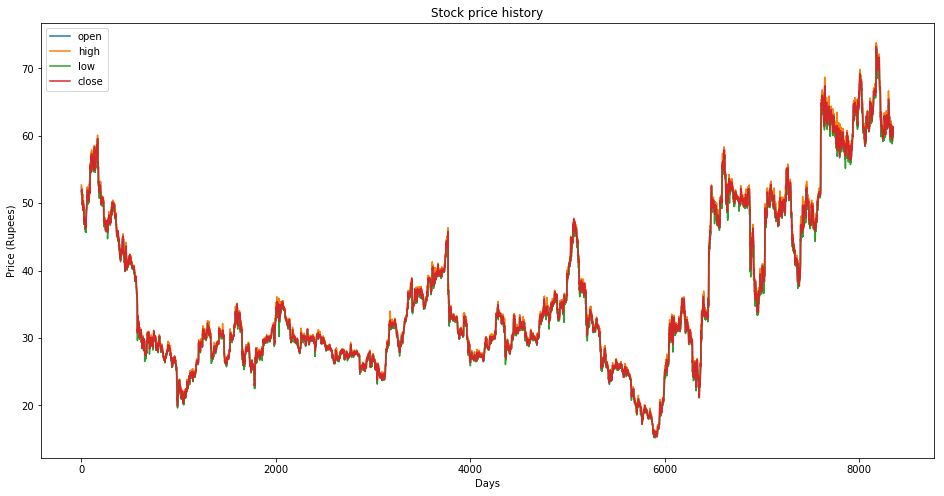

done


In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(preparedTrainingDataDF["open"])
plt.plot(preparedTrainingDataDF["high"])
plt.plot(preparedTrainingDataDF["low"])
plt.plot(preparedTrainingDataDF["close"])
plt.title('Stock price history')
plt.ylabel('Price (Rupees)')
plt.xlabel('Days')
plt.legend(['open','high','low','close'], loc='upper left')
plt.show()
print('done')

In [8]:
trainingDataFilePath = input_data_preparation_response[1]
trainingDataFilePath

'C:\\Users\\kalagi01\\Desktop\\dev\\erai\\data\\adani\\processed/preparedFeaturesWithTrainingData.csv'

In [9]:
import os
import sys  
module_path = os.path.abspath(os.path.join('.'))
sys.path.insert(0, module_path+'\\lib')
from folderPathManipulations import getParentFolder


outputDir=getParentFolder(input_data_preparation_response[1])

corr.to_csv(outputDir+"\\correlation.csv")
print('done')

done
